In [3]:
%load_ext autoreload
%autoreload 2

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from cl.eval import EvalReader as EPPS
import seaborn as sns


In [10]:
def common_parse(name, add):
    if name.find("pertask")>=0:
        _, tid, fold = name.split("_")
        name = "{} on fold {}".format(tid, fold)
    return "Result of Task {} {}:".format(name, add)
def listdct_to_dct(lst, kname, vname):
    ret = {}
    for d in lst:
        ret[tuple(d[kname])] = d[vname]
    return ret
def parse_pairwise_ic(name, measure):
    tname = common_parse(name, "Pairwise Inconsistency")
    print(tname)
    pairwise = listdct_to_dct(measure["inconsist_pairwise"], kname="compare", vname="consistency")
    idx = measure["index"]
    l = len(idx)
    _idx_name = ["Model {}".format(i) for i in idx]
    _df = pd.DataFrame(index = _idx_name[:-1], columns = _idx_name[1:]).fillna("")
    for i in range(l):
        for j in range(i+1, l):
            _df.loc[_idx_name[i], _idx_name[j]] = pairwise[(idx[i],idx[j])]
    #_df.style.set_caption(tname)
    print(_df)
    return _df

def parse_acc(name, measure):
    print(common_parse(name, "Accuracy Per Step"))
    for i in range(len(measure["index"])):
        print(measure["acc_list"][i], end="\t")

def parse_total(name, measure):
    print(common_parse(name, "Inconsistency Together"))
    print(measure["inconsist_tot"])
    return measure["inconsist_tot"]

In [23]:
def read_result(evaluator, bname):
    global rec
    e = evaluator
    print("="*50)
    rec[bname] = []
    for name in e.names[:-3]:
        parse_pairwise_ic(name, e._measure_pairwise(name))
        print()
        parse_acc(name,e._measure_acc(name))
        print()
        tot = parse_total(name, e._measure([name]))
        true_name = "_".join(name.split("_")[-2:])
        rec[bname].append((true_name,tot))
        print(tot)

In [24]:
rec = {}
epps = EPPS()
#epps.load("results/cifar10_5_domain_inc")
epps.load("results/cifar10_ResNet18_#vanilla_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5_")
read_result(epps, "vanilla")
epps.load("results/cifar10_ResNet18_#lwf_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5_")
read_result(epps, "lwf")
epps.load("results/cifar10_ResNet18_#ewc_DScifar10_CIMmask_CTdomain_inc_DAsequential_CvgD9.00e-01_CvgT1.000000e-03_DomS5_")
read_result(epps,"ewc")

Result of Task perslice__Task_0_test Pairwise Inconsistency:
        Model 1   Model 2   Model 3   Model 4
Model 0  0.1025   0.05125  0.062083  0.097083
Model 1          0.020417   0.03625  0.062083
Model 2                    0.045417    0.0775
Model 3                                0.0775

Result of Task perslice__Task_0_test Accuracy Per Step:
0.96125	0.8804166666666666	0.9329166666666666	0.92125	0.8858333333333334	
Result of Task perslice__Task_0_test Inconsistency Together:
0.15583333333333332
0.15583333333333332
Result of Task perslice__Task_0_val Pairwise Inconsistency:
        Model 1 Model 2   Model 3   Model 4
Model 0  0.0975  0.0575  0.073333       0.1
Model 1            0.03  0.041667  0.061667
Model 2                  0.055833    0.0775
Model 3                              0.0775

Result of Task perslice__Task_0_val Accuracy Per Step:
0.9658333333333333	0.8783333333333333	0.9275	0.915	0.88	
Result of Task perslice__Task_0_val Inconsistency Together:
0.1575
0.1575
Result of 

Result of Task perslice__Task_2_train Pairwise Inconsistency:
          Model 3   Model 4
Model 2  0.047738  0.058929
Model 3             0.04119

Result of Task perslice__Task_2_train Accuracy Per Step:
0.9754761904761905	0.944047619047619	0.9323809523809524	
Result of Task perslice__Task_2_train Inconsistency Together:
0.04583333333333333
0.04583333333333333
Result of Task perslice__Task_3_test Pairwise Inconsistency:
          Model 4
Model 3  0.059583

Result of Task perslice__Task_3_test Accuracy Per Step:
0.8004166666666667	0.80375	
Result of Task perslice__Task_3_test Inconsistency Together:
0.06291666666666666
0.06291666666666666
Result of Task perslice__Task_3_val Pairwise Inconsistency:
        Model 4
Model 3  0.0675

Result of Task perslice__Task_3_val Accuracy Per Step:
0.78	0.7816666666666666	
Result of Task perslice__Task_3_val Inconsistency Together:
0.06916666666666667
0.06916666666666667
Result of Task perslice__Task_3_train Pairwise Inconsistency:
          Model 4
M

{'vanilla': [('0_test', 0.15583333333333332), ('0_val', 0.1575), ('0_train', 0.024285714285714285), ('1_test', 0.3325), ('1_val', 0.315), ('1_train', 0.08488095238095238), ('2_test', 0.27), ('2_val', 0.2608333333333333), ('2_train', 0.10130952380952381), ('3_test', 0.04625), ('3_val', 0.058333333333333334), ('3_train', 0.011547619047619048)], 'lwf': [('0_test', 0.08708333333333333), ('0_val', 0.08916666666666667), ('0_train', 0.007857142857142858), ('1_test', 0.24875), ('1_val', 0.2425), ('1_train', 0.03464285714285714), ('2_test', 0.17875), ('2_val', 0.17833333333333334), ('2_train', 0.04583333333333333), ('3_test', 0.06291666666666666), ('3_val', 0.06916666666666667), ('3_train', 0.013333333333333334)], 'ewc': [('0_test', 0.15083333333333335), ('0_val', 0.14833333333333334), ('0_train', 0.1394047619047619), ('1_test', 0.0), ('1_val', 0.0), ('1_train', 0.0), ('2_test', 0.0), ('2_val', 0.0), ('2_train', 0.0), ('3_test', 0.0), ('3_val', 0.0), ('3_train', 0.0)]}


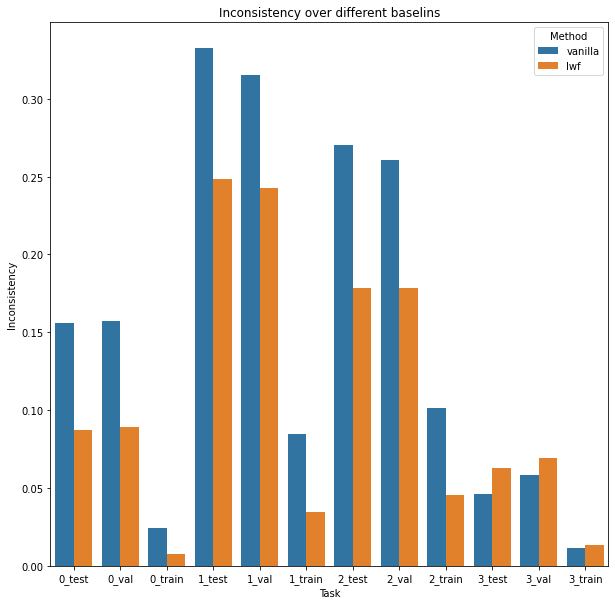

<Figure size 432x288 with 0 Axes>

In [20]:
def draw_pic():
    names = ["vanilla","lwf"]#,"ewc"]
    plt.figure(figsize=(10,10))
    tasks = []
    vals = []
    comps = []
    print(rec)
    for name in names:
        for v in rec[name]:
            task, val = v
            comps.append(name)
            tasks.append(task)
            vals.append(val)
    df = pd.DataFrame({"Task":tasks, "Method":comps, "Inconsistency":vals})
    pd.melt(df, id_vars=['Task'], value_vars=['Inconsistency'])
    sns.barplot(x = 'Task', y = 'Inconsistency', data = df, hue="Method")
    plt.ylabel('Inconsistency')
    plt.title('Inconsistency over different baselins');
    plt.show()
    plt.savefig("Inconsistency.png")
draw_pic()

In [19]:
print(epps.names)
print(epps.hist_version["pertask_0_test"][:10,:10])

['perslice__Task_0_test', 'perslice__Task_0_val', 'perslice__Task_0_train', 'perslice__Task_1_test', 'perslice__Task_1_val', 'perslice__Task_1_train', 'perslice__Task_2_test', 'perslice__Task_2_val', 'perslice__Task_2_train', 'perslice__Task_3_test', 'perslice__Task_3_val', 'perslice__Task_3_train', 'perslice__Task_4_test', 'perslice__Task_4_val', 'perslice__Task_4_train']


KeyError: 'pertask_0_test is not a file in the archive'